In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.model_selection import train_test_split
import os
import time


In [2]:
physical_device = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_device[0], True)
except:
    print("error")


In [3]:
 features  = ["bus","motorcycle","plane","train"]

In [4]:
file_dir = 'Vehicle2'
def dataset(file_directory):
    featured = []
    labelled = []
    for feature in features:
        label = features.index(feature)
        file = os.path.join(file_directory, feature)
        for path in os.listdir(file):  
            img = os.path.join(file, path)
            images = cv2.imread(img)
            pics = cv2.resize(images, (64,64))
            featured.append(pics)
            labelled.append(label)
    print("Done!!!")
    return featured, labelled

In [5]:
feature, label = dataset(file_dir)

Done!!!


In [6]:
feature = np.array(feature)
feature = feature/255.0
label = np.array(label)
print(feature.shape), print(label.shape)

(80, 64, 64, 3)
(80,)


(None, None)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size = 0.20, shuffle = True, random_state = 42)

In [8]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(64, 64, 64, 3) (16, 64, 64, 3) (64,) (16,)


In [9]:
num_classes = 4
img_height = 64
img_width = 64

In [10]:
model = Sequential([
    #layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))
    layers.Conv2D(16, 3, padding=('same'), activation = 'relu',input_shape = (img_height,img_width,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)   
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [16]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=optimizer,metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train,batch_size=16,epochs=5,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
4/4 [==============================] - 20s 191ms/step - loss: 1.4585 - accuracy: 0.2500 - val_loss: 1.3764 - val_accuracy: 0.3125
Epoch 2/5
4/4 [==============================] - 0s 40ms/step - loss: 1.3450 - accuracy: 0.5000 - val_loss: 1.3615 - val_accuracy: 0.1875
Epoch 3/5
4/4 [==============================] - 0s 26ms/step - loss: 1.2850 - accuracy: 0.5625 - val_loss: 1.2619 - val_accuracy: 0.6875
Epoch 4/5
4/4 [==============================] - 0s 42ms/step - loss: 1.1919 - accuracy: 0.6562 - val_loss: 1.2265 - val_accuracy: 0.5000
Epoch 5/5
4/4 [==============================] - 0s 41ms/step - loss: 1.0255 - accuracy: 0.5781 - val_loss: 1.0474 - val_accuracy: 0.6250
Test loss: 1.047431468963623
Test accuracy: 0.625


ERROR! Session/line number was not unique in database. History logging moved to new session 996


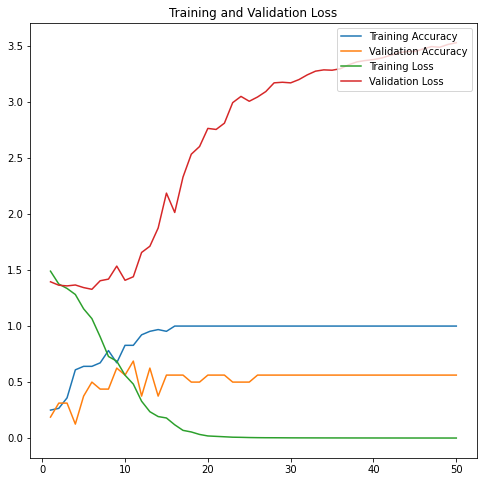

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(loss) + 1)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

# Fine Tunning by increasing number of layers and changing the learning rate to 0.0001

In [ ]:
model2 = Sequential([
    #layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))
    layers.Conv2D(16, 3, padding=('same'), activation = 'relu',input_shape = (img_height,img_width,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)   
])

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.0001)
model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=optimizer,metrics=['accuracy'])

In [ ]:
print(model2.summary())

In [ ]:
history2 = model2.fit(x_train, y_train,batch_size=16,epochs=50,verbose=1,validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(1, len(loss) + 1)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

# Model Prediction

In [17]:
def predict(img_path):   
    imgs1 = cv2.imread(img_path)
    img = cv2.resize(imgs1,(64,64))
    plt.imshow(imgs1,cmap='gray')
    img = np.reshape(img,[1,64,64,3])
    classes = model.predict_classes(img)
    if classes == 0:
        print('Bus')
    elif classes == 1:
        print("Motorcycle")
    elif classes == 2:
        print("Plane")  
    else:
         print("Train")
    plt.show()
                    

Train


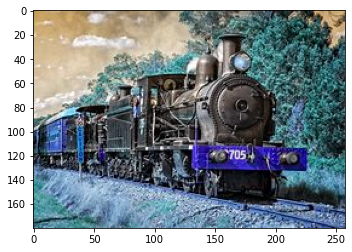

Train


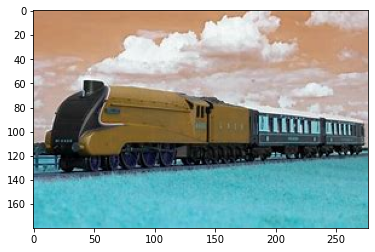

Plane


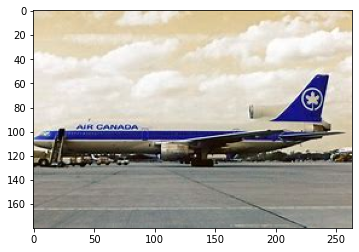

In [18]:
predict('Vehicle2/train/Train2.jpg')
predict('Vehicle2/train/Train14.jpg')
predict('Vehicle2/plane/AirPlane1.jpg')

In [28]:
from tf_explain.callbacks.grad_cam import GradCAMCallback

callbacks = [
    GradCAMCallback(
        validation_data=(x_test, y_test),
        layer_name="conv2d_8",
        class_index=0,
        output_dir='blessing',
    )
]

model.fit(x_train, y_train, batch_size=2, epochs=2, callbacks=callbacks)

ERROR! Session/line number was not unique in database. History logging moved to new session 1009
Train on 64 samples
Epoch 1/2
64/64 [==============================] - 1s 11ms/sample - loss: 0.5676 - accuracy: 0.9531
Epoch 2/2
64/64 [==============================] - 1s 9ms/sample - loss: 1.0532 - accuracy: 0.5312


In [29]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [30]:
import datetime

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Train on 64 samples, validate on 16 samples
Epoch 1/5
64/64 [==============================] - 2s 30ms/sample - loss: 0.3466 - accuracy: 0.9531 - val_loss: 4.3213 - val_accuracy: 0.5000
Epoch 2/5
64/64 [==============================] - 0s 4ms/sample - loss: 0.4573 - accuracy: 0.9844 - val_loss: 4.5385 - val_accuracy: 0.3750
Epoch 3/5
64/64 [==============================] - 0s 4ms/sample - loss: 0.3484 - accuracy: 0.9219 - val_loss: 3.7305 - val_accuracy: 0.3750
Epoch 4/5
64/64 [==============================] - 0s 4ms/sample - loss: 0.4332 - accuracy: 0.8594 - val_loss: 2.8276 - val_accuracy: 0.3750
Epoch 5/5
64/64 [==============================] - 0s 4ms/sample - loss: 0.5415 - accuracy: 0.7969 - val_loss: 2.8488 - val_accuracy: 0.4375


In [86]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [88]:
%tensorboard --logdir log_dir/fit

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 20180.

In [79]:
!taskkill /F /PID 10336

ERROR: The process "10336" not found.
